# Plot MICRESS® data with Matplotlib

## Average grain radius over time

In [1]:
filename = 'Test/T025_Grain_Growth/T025_Grain_Growth.TabK'

Read simulation time and average grain radius

In [2]:
import numpy as np

time, radius = np.loadtxt(filename, skiprows=1, usecols=[0,1], unpack=True)

Define fitting function

In [3]:
def fit(x, a, b, c):
    return a + b * x ** c

Plot average grain radius over time

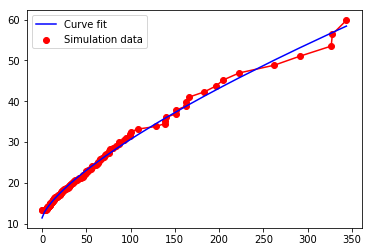

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

params, params_covariance = optimize.curve_fit(fit, time, radius)

plt.scatter(time, radius, label='Simulation data', color="red")
plt.plot(time, radius, '-', color="red")
plt.plot(time, fit(time, params[0], params[1], params[2]), label='Curve fit', color="blue")
plt.legend(loc='best')
plt.show()